# Thompson Sampling

## Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [16]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [17]:
import random
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range (0, N):
  ad = 0
  max_random = 0
  for i in range (0, d):
    random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i] +1)
    if random_beta > max_random:
      ad = i
      max_random = random_beta
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
  else:
     number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

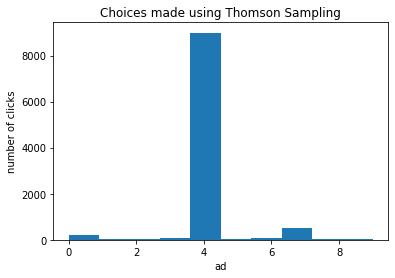

total reward: 2592
total reward %: 25.919999999999998


In [18]:
plt.hist(ads_selected)
plt.xlabel('ad')
plt.ylabel('number of clicks')
plt.title('Choices made using Thomson Sampling')
plt.show()
print('total reward:', total_reward)
print('total reward %:', (total_reward/N)*100)
# almost 26%, seems Thompson sampling is better
# even with 500 rounds the alg can figure out which ad is best